# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, balanced_accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import mean_squared_error , mean_absolute_error, precision_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [93]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [94]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [95]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [96]:
# Your code here :
X = data.drop(columns=['MEDV'])  # Features
y = data['MEDV']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (404, 13)
Testing set size: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [97]:
# Your code here :
model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test) 

## 3. Calculate and print R-squared for both the training and the testing set.

In [98]:
# Your code here :
r2_train = r2_score(y_train, y_train_pred)  
r2_test = r2_score(y_test, y_test_pred)   

print(f"R-squared for Training Set: {r2_train:.4f}")
print(f"R-squared for Testing Set: {r2_test:.4f}")

R-squared for Training Set: 0.7509
R-squared for Testing Set: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [99]:
# Your code here :
mse_train = mean_squared_error(y_train, y_train_pred)  
mse_test = mean_squared_error(y_test, y_test_pred)    

print(f"MSE for Training Set: {mse_train:.4f}")
print(f"MSE for Testing Set: {mse_test:.4f}")

MSE for Training Set: 21.6414
MSE for Testing Set: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [100]:
# Your code here :
mae_train = mean_absolute_error(y_train, y_train_pred)  
mae_test = mean_absolute_error(y_test, y_test_pred)    

print(f"MAE for Training Set: {mae_train:.4f}")
print(f"MAE for Testing Set: {mae_test:.4f}")

MAE for Training Set: 3.3148
MAE for Testing Set: 3.1891


## Classification Model Evaluation

In [101]:
from sklearn.datasets import load_iris
data = load_iris()

In [102]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [103]:
column_names = data.feature_names

In [104]:
df = pd.DataFrame(data['data'],columns=column_names)

In [105]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [106]:
target = pd.DataFrame(data.target)

In [107]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [108]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [125]:
# Your code here :
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120, 1)
(30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [110]:
# Your code here :
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train) # train the data 

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



## 8. Calculate and print the accuracy score for both the training and the testing set.

In [111]:
# Your code here :
# Calculate accuracy:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy: {test_acc:.2f}")

Training Accuracy: 0.97
Testing Accuracy: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [112]:
# Your code here :
# Calculate balanced accuracy:
train_ba = balanced_accuracy_score(y_train, y_train_pred)
test_ba = balanced_accuracy_score(y_test, y_test_pred)

print(f"Training Balanced Accuracy: {train_ba:.2f}")
print(f"Testing Balanced Accuracy: {test_ba:.2f}")

Training Balanced Accuracy: 0.98
Testing Balanced Accuracy: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [113]:
# Your code here :
# Calculate precision:
train_prec = precision_score(y_train, y_train_pred, average='weighted')
test_prec = precision_score(y_test, y_test_pred, average='weighted')

print(f"Training Precision: {train_prec:.2f}")
print(f"Testing Precision: {test_prec:.2f}")

Training Precision: 0.98
Testing Precision: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [114]:
# Your code here :
# Calculate recall score:
re_train = recall_score(y_train, y_train_pred, average='weighted')
re_test = recall_score(y_test, y_test_pred, average='weighted')

# Display the recall scores
print(f"Training Recall: {re_train:.2f}")
print(f"Testing Recall: {re_test:.2f}")

Training Recall: 0.97
Testing Recall: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [115]:
# Your code here :

# Calculate F1 score:
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Display the F1 scores
print(f"Training F1 Score: {f1_train:.2f}")
print(f"Testing F1 Score: {f1_test:.2f}")

Training F1 Score: 0.97


Testing F1 Score: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

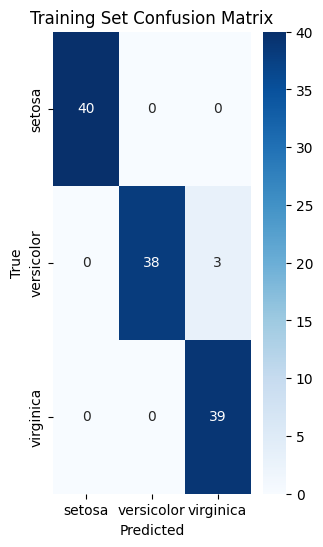

In [123]:
# Your code here :
# Generate confusion matrices:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
plt.figure(figsize=(7, 6))

# Training confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the plots
plt.show()

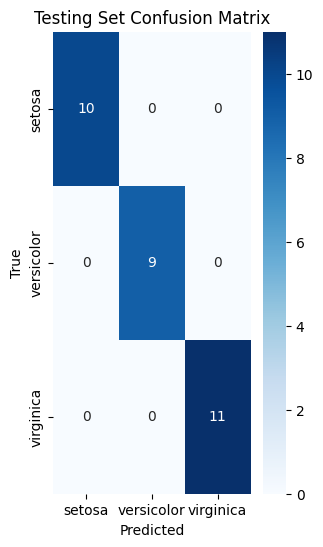

In [124]:
plt.figure(figsize=(7, 6))
# Testing confusion matrix
plt.subplot(1, 2, 2) 
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues", xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.title('Testing Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [117]:
# Have fun here !

In [133]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Generate predictions on training and testing sets
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Compute Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

# Compute Precision
train_precision_dt = precision_score(y_train, y_train_pred_dt, average='weighted')
test_precision_dt = precision_score(y_test, y_test_pred_dt, average='weighted')

# Compute Recall
train_recall_dt = recall_score(y_train, y_train_pred_dt, average='weighted')
test_recall_dt = recall_score(y_test, y_test_pred_dt, average='weighted')

# Compute F1 Score
train_f1_dt = f1_score(y_train, y_train_pred_dt, average='weighted')
test_f1_dt = f1_score(y_test, y_test_pred_dt, average='weighted')

# Print the metrics
print(f"Decision Tree - Training Accuracy: {train_accuracy_dt:.2f}")
print(f"Decision Tree - Testing Accuracy: {test_accuracy_dt:.2f}")
print(f"Decision Tree - Training Precision: {train_precision_dt:.2f}")
print(f"Decision Tree - Testing Precision: {test_precision_dt:.2f}")
print(f"Decision Tree - Training Recall: {train_recall_dt:.2f}")
print(f"Decision Tree - Testing Recall: {test_recall_dt:.2f}")
print(f"Decision Tree - Training F1 Score: {train_f1_dt:.2f}")
print(f"Decision Tree - Testing F1 Score: {test_f1_dt:.2f}")



Decision Tree - Training Accuracy: 0.97
Decision Tree - Testing Accuracy: 1.00
Decision Tree - Training Precision: 0.98
Decision Tree - Testing Precision: 1.00
Decision Tree - Training Recall: 0.97
Decision Tree - Testing Recall: 1.00
Decision Tree - Training F1 Score: 0.97
Decision Tree - Testing F1 Score: 1.00


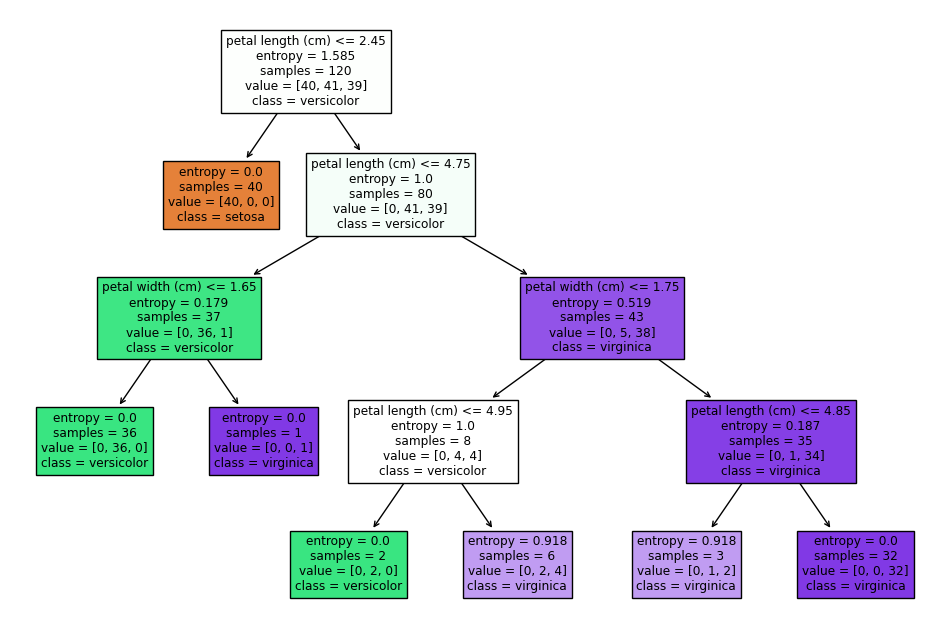

In [134]:
plt.figure(figsize=(12, 8))

# Plot the decision tree
plot_tree(dt_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)

# Show the tree
plt.show()